In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def svm(X, y):
    lr=0.01
    lambda_param=0.0001
    n_iters=1000
    
    n_samples, n_features = X.shape
        
    y_ = np.where(y <= 0, -1, 1)
        
    w = np.zeros(n_features)
    b = 0

    for inter in range(n_iters):
        for idx, x_i in enumerate(X):
            condition = y_[idx] * (np.dot(x_i, w) - b) >= 1
            if condition:
                w -= lr * (2 * lambda_param * w)
            else:
                w -= lr * (2 * lambda_param * w - np.dot(x_i, y_[idx]))
                b -= lr * y_[idx]
    return w,b

In [3]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

def visualize_svm():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker="o",c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'r--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-1,x1_max+1])

    plt.show()

In [4]:
iris = datasets.load_iris()
X=iris.data[:100, [1,3]]
y=iris.target[:100]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

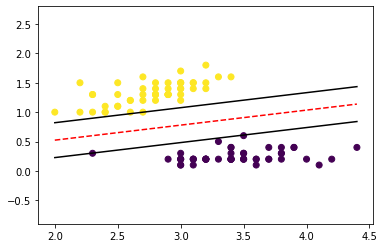

In [5]:
w,b=svm(X,y)

visualize_svm()

## Reference:

https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47 - Rohith Gandhi

In [1]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train_feature = []
for i in range(len(X_train)):
    feature = hog(X_train[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_train_feature.append(feature)
X_train_feature = np.array(X_train_feature,dtype = np.float32)


X_test_feature = []
for i in range(len(X_test)):
    feature = hog(X_test[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_test_feature.append(feature)
X_test_feature = np.array(X_test_feature,dtype=np.float32)

In [11]:
model = LinearSVC(C=10)
model.fit(X_train_feature,y_train)
y_pre = model.predict(X_test_feature)
print(accuracy_score(y_test,y_pre))

0.8988


/Users/anh/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
image = cv2.imread("IMG_8329.jpg")
im_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray,(5,5),0)
im,thre = cv2.threshold(im_blur,90,255,cv2.THRESH_BINARY_INV)
contours,hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

In [13]:
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
    roi = thre[y:y+h,x:x+w]
    roi = np.pad(roi,(20,20),'constant',constant_values=(0,0))
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1),block_norm="L2")
    nbr = model.predict(np.array([roi_hog_fd], np.float32))
    cv2.putText(image, str(int(nbr[0])), (x, y),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
    
cv2.imwrite("anh_edit.jpg",image)

True

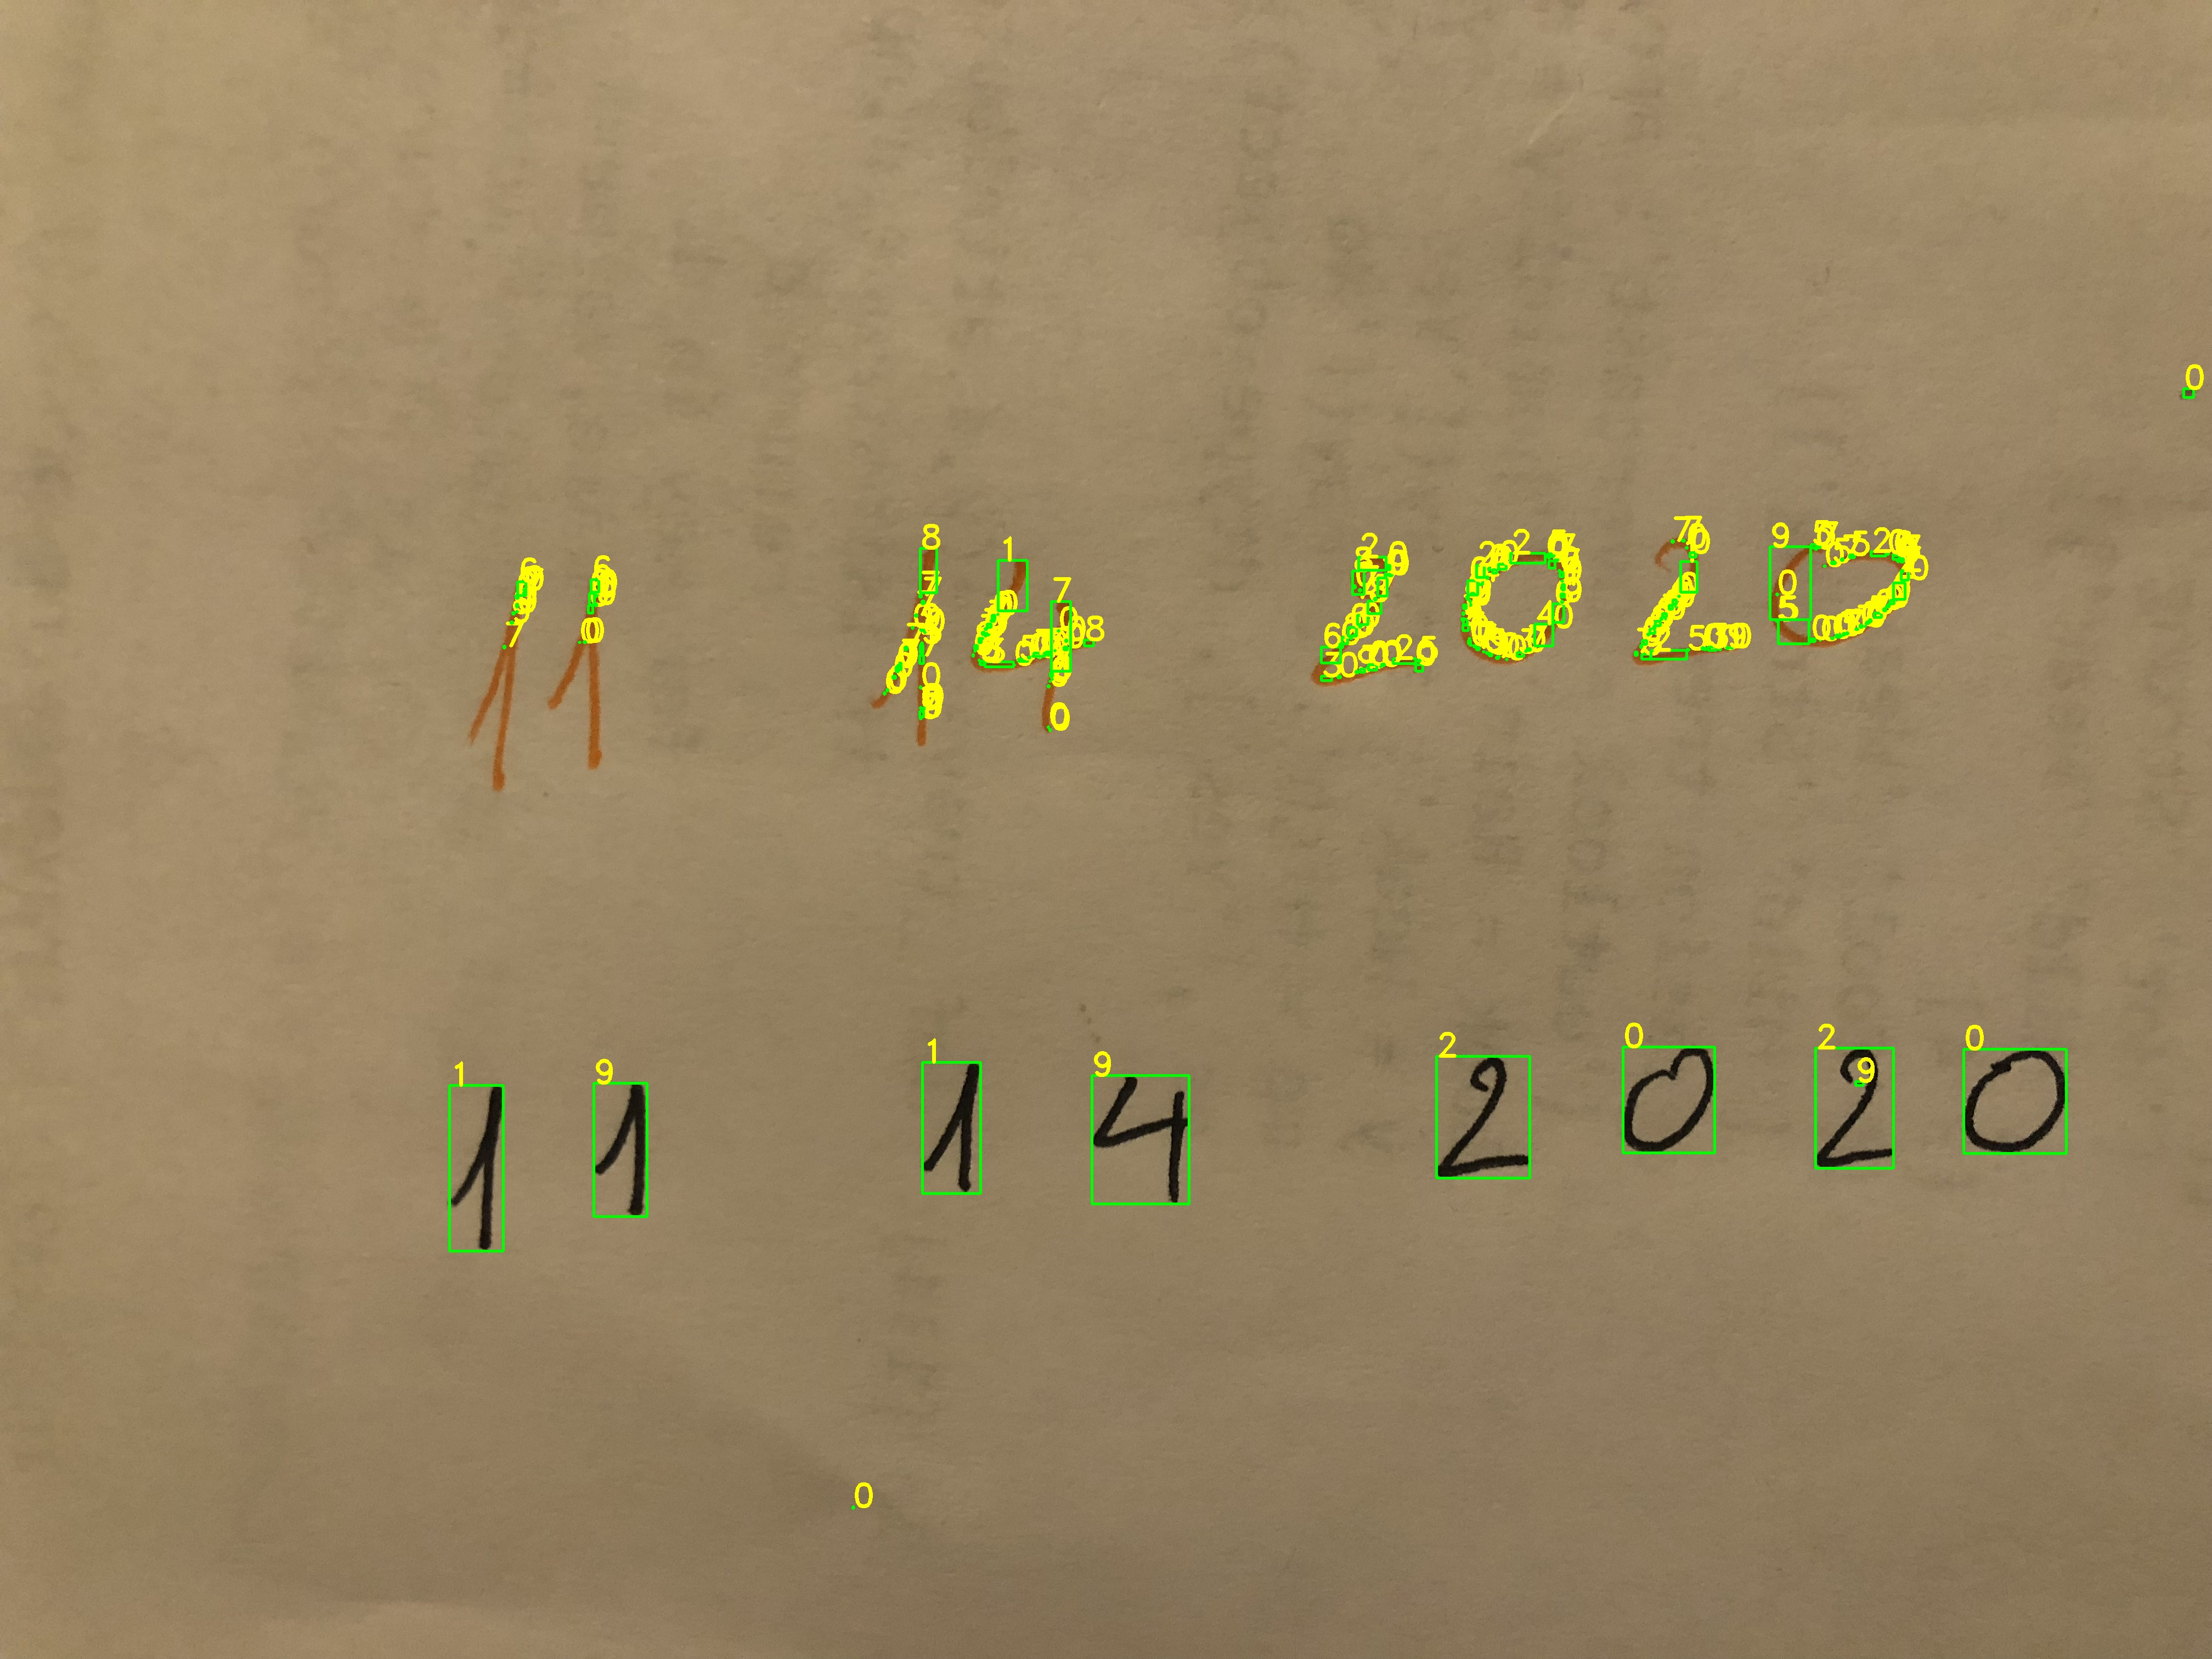

In [14]:
from IPython.display import Image
Image(filename='anh_edit.jpg') 